In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  


In [2]:
file= open('userprofile.csv', mode='r', encoding='utf-8', errors='ignore')
training_data = pd.read_csv(file)
training_data["smoker"] = training_data.smoker.replace("?","false")
training_data["smoker"] = (training_data.smoker == "true") * 1

In [3]:
training_data.drop(training_data.index[training_data['dress_preference'] == "?"], inplace = True)
hot_dress_preference = pd.get_dummies(training_data['dress_preference'],prefix='dress_preference')
del training_data['dress_preference']
training_data = pd.concat([training_data, hot_dress_preference], axis=1, sort=False)
del training_data['latitude']
del training_data['longitude']
del training_data['interest']
del training_data['personality']
del training_data['color']
del training_data['religion']
del training_data['weight']
del training_data['height']
del training_data['birth_year']

In [4]:
hot_drink_level = pd.get_dummies(training_data['drink_level'],prefix='drink_level')
del training_data['drink_level']
training_data = pd.concat([training_data, hot_drink_level], axis=1, sort=False)

In [5]:
training_data.drop(training_data.index[training_data['transport'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['ambience'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['hijos'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['activity'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['budget'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['marital_status'] == "?"], inplace = True)

In [6]:
hot_ambience = pd.get_dummies(training_data['ambience'],prefix='ambience')
del training_data['ambience']
training_data = pd.concat([training_data, hot_ambience], axis=1, sort=False)

In [7]:
hot_transport = pd.get_dummies(training_data['transport'],prefix='transport')
del training_data['transport']
training_data = pd.concat([training_data, hot_transport], axis=1, sort=False)

In [8]:
hot_hijos = pd.get_dummies(training_data['hijos'],prefix='hijos')
del training_data['hijos']
training_data = pd.concat([training_data, hot_hijos], axis=1, sort=False)

In [9]:
hot_activity = pd.get_dummies(training_data['activity'],prefix='activity')
del training_data['activity']
training_data = pd.concat([training_data, hot_activity], axis=1, sort=False)

In [10]:
hot_budget = pd.get_dummies(training_data['budget'],prefix='budget')
del training_data['budget']
training_data = pd.concat([training_data, hot_budget], axis=1, sort=False)

In [11]:
hot_marital_status = pd.get_dummies(training_data['marital_status'],prefix='marital_status')
del training_data['marital_status']
training_data = pd.concat([training_data, hot_marital_status], axis=1, sort=False)

In [12]:
training_data.to_csv("binaryzed_users.csv")

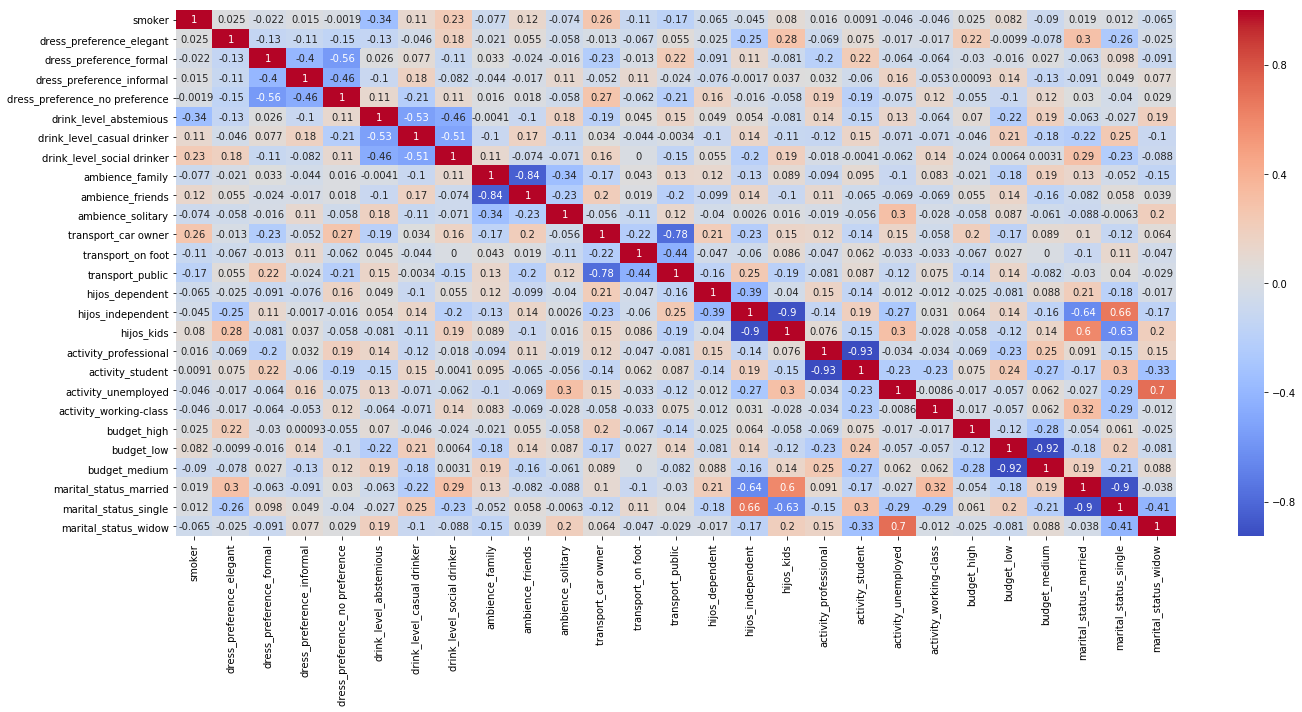

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(training_data.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()